## Generating a Toy Dataset via Sampling from Different Exponential Smoothing Models

In [1]:
from metats.datasets import ETSDataset

ets_generator = ETSDataset({'A,N,N': 512,
                             'M,M,M': 512}, length=30, freq=4)

data, labels = ets_generator.load(return_family=True)
colors = list(map(lambda x: (x=='A,N,N')*1, labels))

## Normalizing the time series

In [2]:
from sklearn.preprocessing import StandardScaler

scaled_data = StandardScaler().fit_transform(data.T)
data = scaled_data.T[:, :, None]

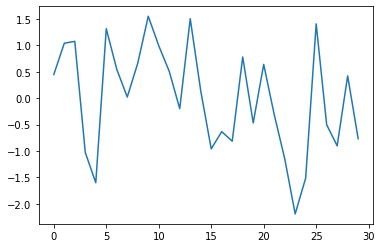

In [3]:
import matplotlib.pyplot as plt
_ = plt.plot(data[10, :, 0])

## Training A Deep AutoEncoder

In [4]:
from metats.features.unsupervised import DeepAutoEncoder
from metats.features.deep import AutoEncoder, MLPEncoder, MLPDecoder

enc = MLPEncoder(1, 30, 8, (16,))
dec = MLPDecoder(1, 30, 8, (16,))

ae = AutoEncoder(encoder=enc, decoder=dec)

ae_feature = DeepAutoEncoder(auto_encoder=ae, epochs=150, verbose=True)

In [5]:
ae_feature.fit(data)

Deep AE Reconstruction Loss: 1.042
Deep AE Reconstruction Loss: 1.065
Deep AE Reconstruction Loss: 1.018
Deep AE Reconstruction Loss: 1.001
Deep AE Reconstruction Loss: 0.983
Deep AE Reconstruction Loss: 0.969
Deep AE Reconstruction Loss: 0.955
Deep AE Reconstruction Loss: 0.937
Deep AE Reconstruction Loss: 0.914
Deep AE Reconstruction Loss: 0.893
Deep AE Reconstruction Loss: 0.869
Deep AE Reconstruction Loss: 0.849
Deep AE Reconstruction Loss: 0.802
Deep AE Reconstruction Loss: 0.848
Deep AE Reconstruction Loss: 0.833
Deep AE Reconstruction Loss: 0.761
Deep AE Reconstruction Loss: 0.800
Deep AE Reconstruction Loss: 0.811
Deep AE Reconstruction Loss: 0.749
Deep AE Reconstruction Loss: 0.776
Deep AE Reconstruction Loss: 0.741
Deep AE Reconstruction Loss: 0.686
Deep AE Reconstruction Loss: 0.747
Deep AE Reconstruction Loss: 0.719
Deep AE Reconstruction Loss: 0.679
Deep AE Reconstruction Loss: 0.666
Deep AE Reconstruction Loss: 0.711
Deep AE Reconstruction Loss: 0.639
Deep AE Reconstructi

## Generating meta-features

### Deep Unsupervised Meta-Features

In [6]:
deep_features = ae_feature.transform(data)

### Statistical Features using TsFresh

In [7]:
from metats.features.statistical import TsFresh

stat_features = TsFresh().transform(data)

Feature Extraction: 100%|██████████| 10/10 [00:43<00:00,  4.35s/it]


## Dimensionality Reduction for Visualization 

In [8]:
from umap import UMAP
deep_reduced = UMAP().fit_transform(deep_features)
stat_reduced = UMAP().fit_transform(stat_features)

## Visualizing the Meta-Features

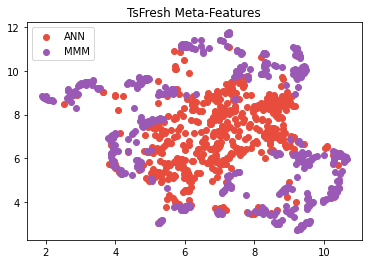

In [9]:
plt.scatter(stat_reduced[:512, 0], stat_reduced[:512, 1], c='#e74c3c', label='ANN')
plt.scatter(stat_reduced[512:, 0], stat_reduced[512:, 1], c='#9b59b6', label='MMM')
plt.legend()
plt.title('TsFresh Meta-Features')
_ = plt.show()

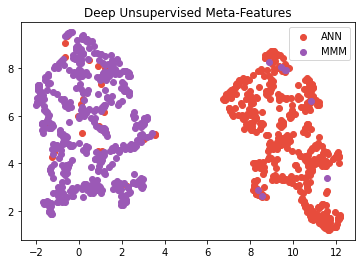

In [10]:
plt.scatter(deep_reduced[:512, 0], deep_reduced[:512, 1], c='#e74c3c', label='ANN')
plt.scatter(deep_reduced[512:, 0], deep_reduced[512:, 1], c='#9b59b6', label='MMM')
plt.legend()
plt.title('Deep Unsupervised Meta-Features')
_ = plt.show()